In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from utils import plot_utils
plot_utils.set_plotting_defaults()

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
n_from_end = 0; # if zero, load most recent; if positive, load second most recent etc.

fitting_type = 'texture_pyramid_ridge_4ori_4sf'

root = os.path.dirname(os.path.dirname(os.getcwd()))
if volume_space:
    folder2load = os.path.join(root, 'model_fits','S%02d'%subject, fitting_type)
else:
    folder2load = os.path.join(root, 'model_fits','S%02d_surface'%subject, fitting_type)
# within this folder, assuming we want the most recent version that was saved
files_in_dir = os.listdir(folder2load)
from datetime import datetime
my_dates = [f for f in files_in_dir if 'ipynb' not in f and 'DEBUG' not in f]
my_dates.sort(key=lambda date: datetime.strptime(date, "%b-%d-%Y_%H%M"))
most_recent_date = my_dates[-1-n_from_end]

# most_recent_date = 'Aug-30-2021_0807_16'
# most_recent_date = 'Aug-30-2021_2008_22'
# most_recent_date = 'Jul-06-2021_0356'

subfolder2load = os.path.join(folder2load, most_recent_date)
file2load = os.listdir(subfolder2load)[0]
fullfile2load = os.path.join(subfolder2load, file2load)

print('loading from %s\n'%fullfile2load)

out = torch.load(fullfile2load)
print(out.keys())

fig_save_folder = os.path.join(root,'figures','S%02d'%subject, fitting_type, most_recent_date)
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf/Aug-23-2021_2357/all_fit_params

dict_keys(['aperture', 'aperture_rf_range', 'models', 'feature_info', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'best_params', 'lambdas', 'best_lambdas', 'best_losses', 'val_cc', 'val_r2', 'zscore_features', 'nonlin_fn', 'n_prf_sd_out', 'debug', 'up_to_sess', 'shuff_rnd_seed'])


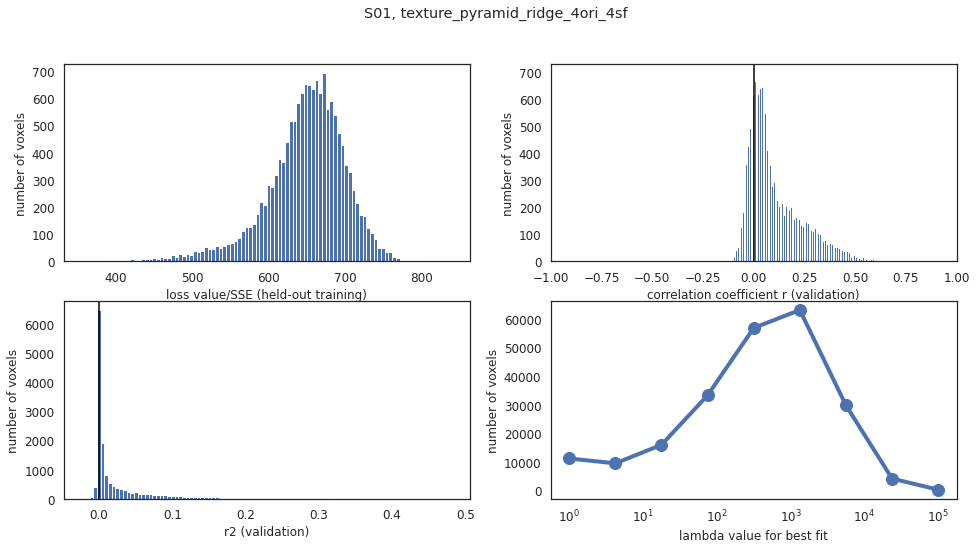

In [3]:
plot_utils.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

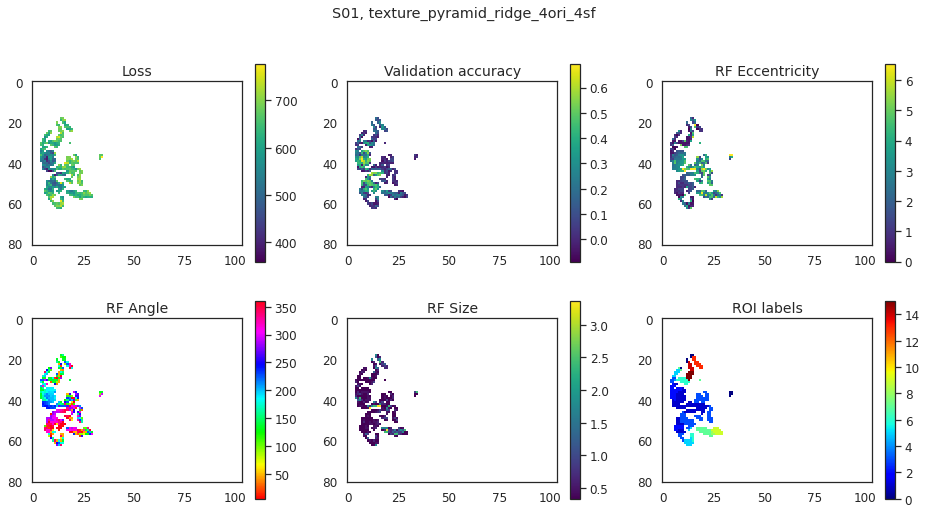

In [3]:
plot_utils.plot_fit_summary_volume_space(subject, fitting_type,out, fig_save_folder)

In [5]:
len(out['best_params'])

7

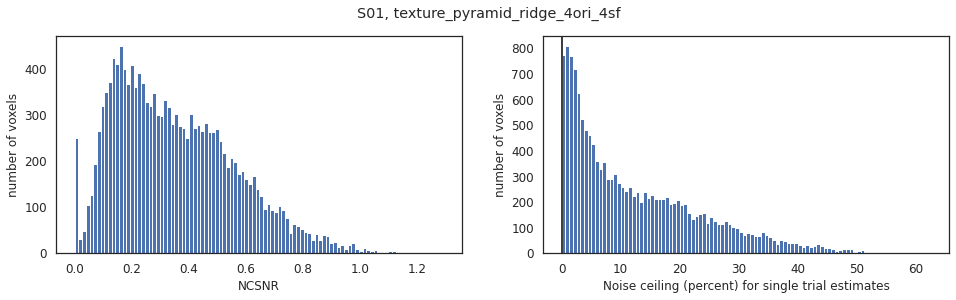

In [4]:
plot_utils.plot_noise_ceilings(subject, fitting_type,out, fig_save_folder)

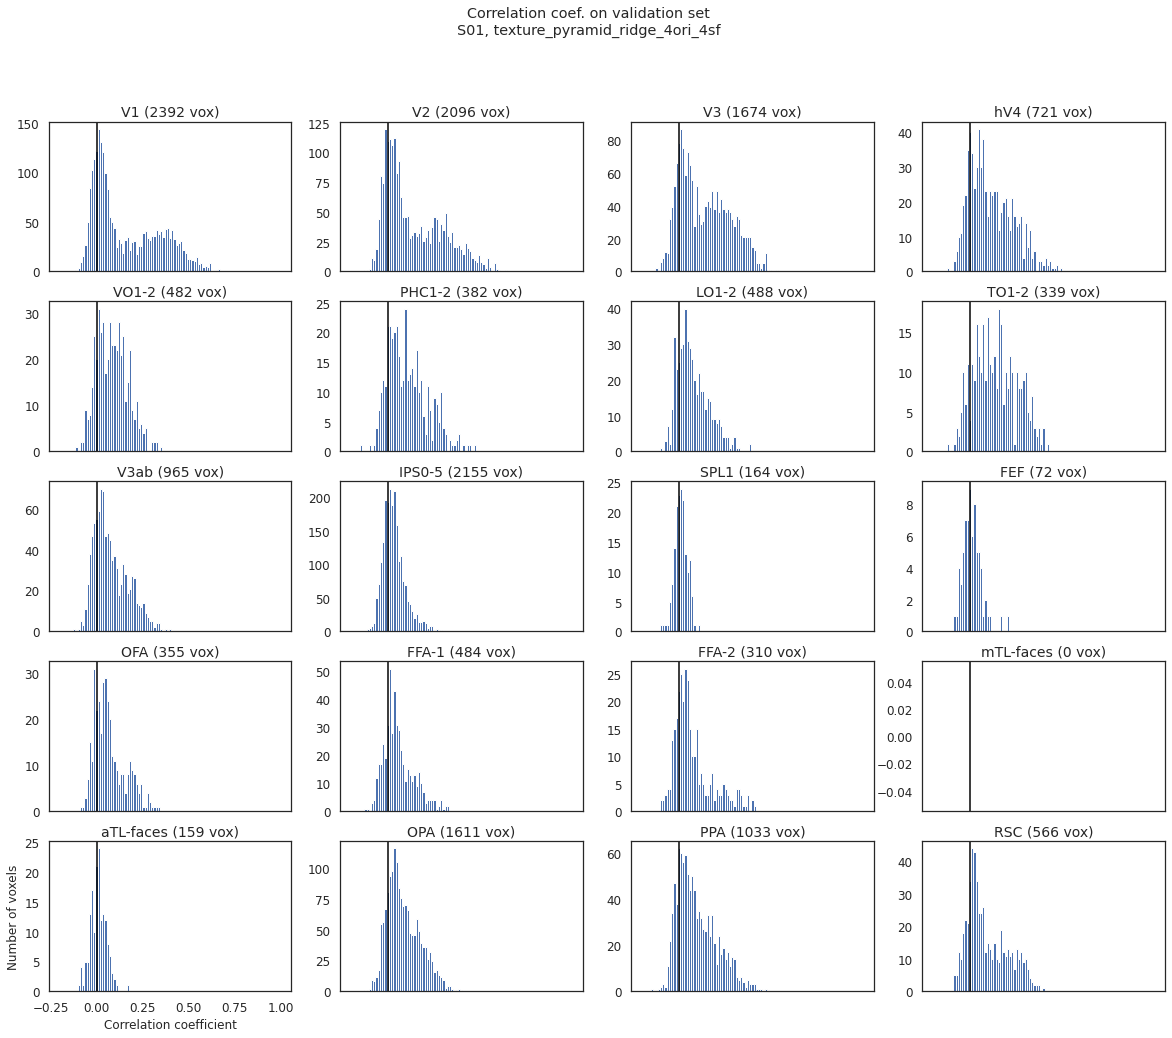

In [5]:
plot_utils.plot_cc_each_roi(subject, fitting_type,out, fig_save_folder)

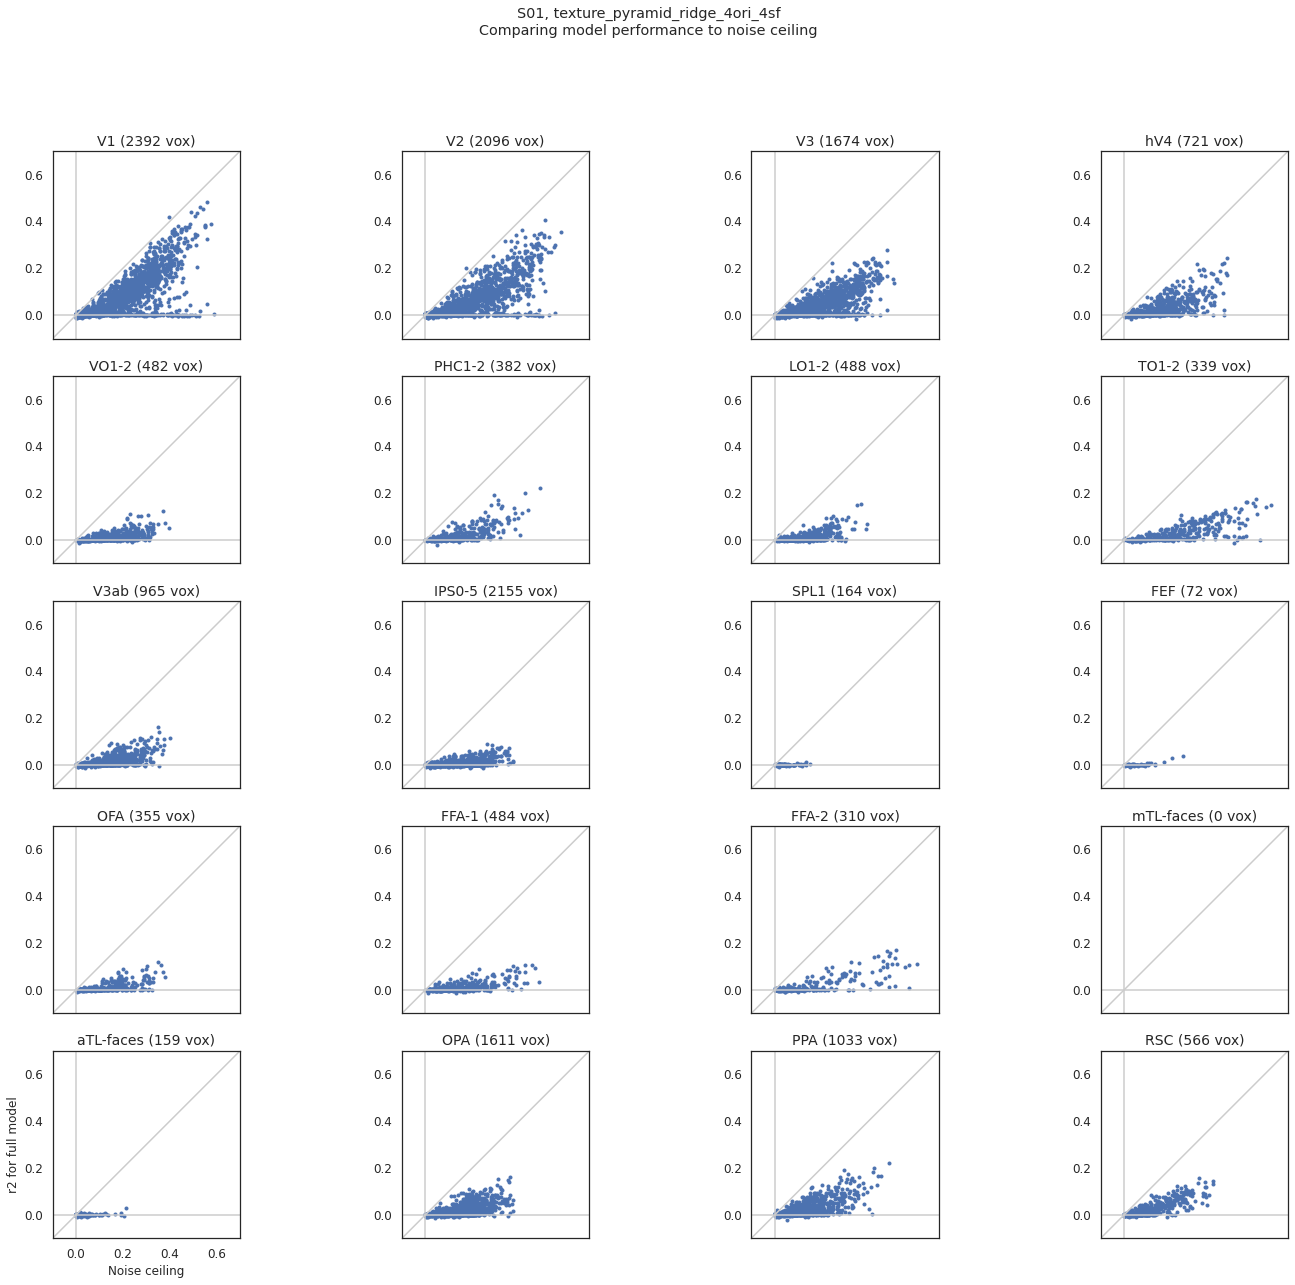

In [6]:
plot_utils.plot_r2_vs_nc(subject, fitting_type,out, fig_save_folder)

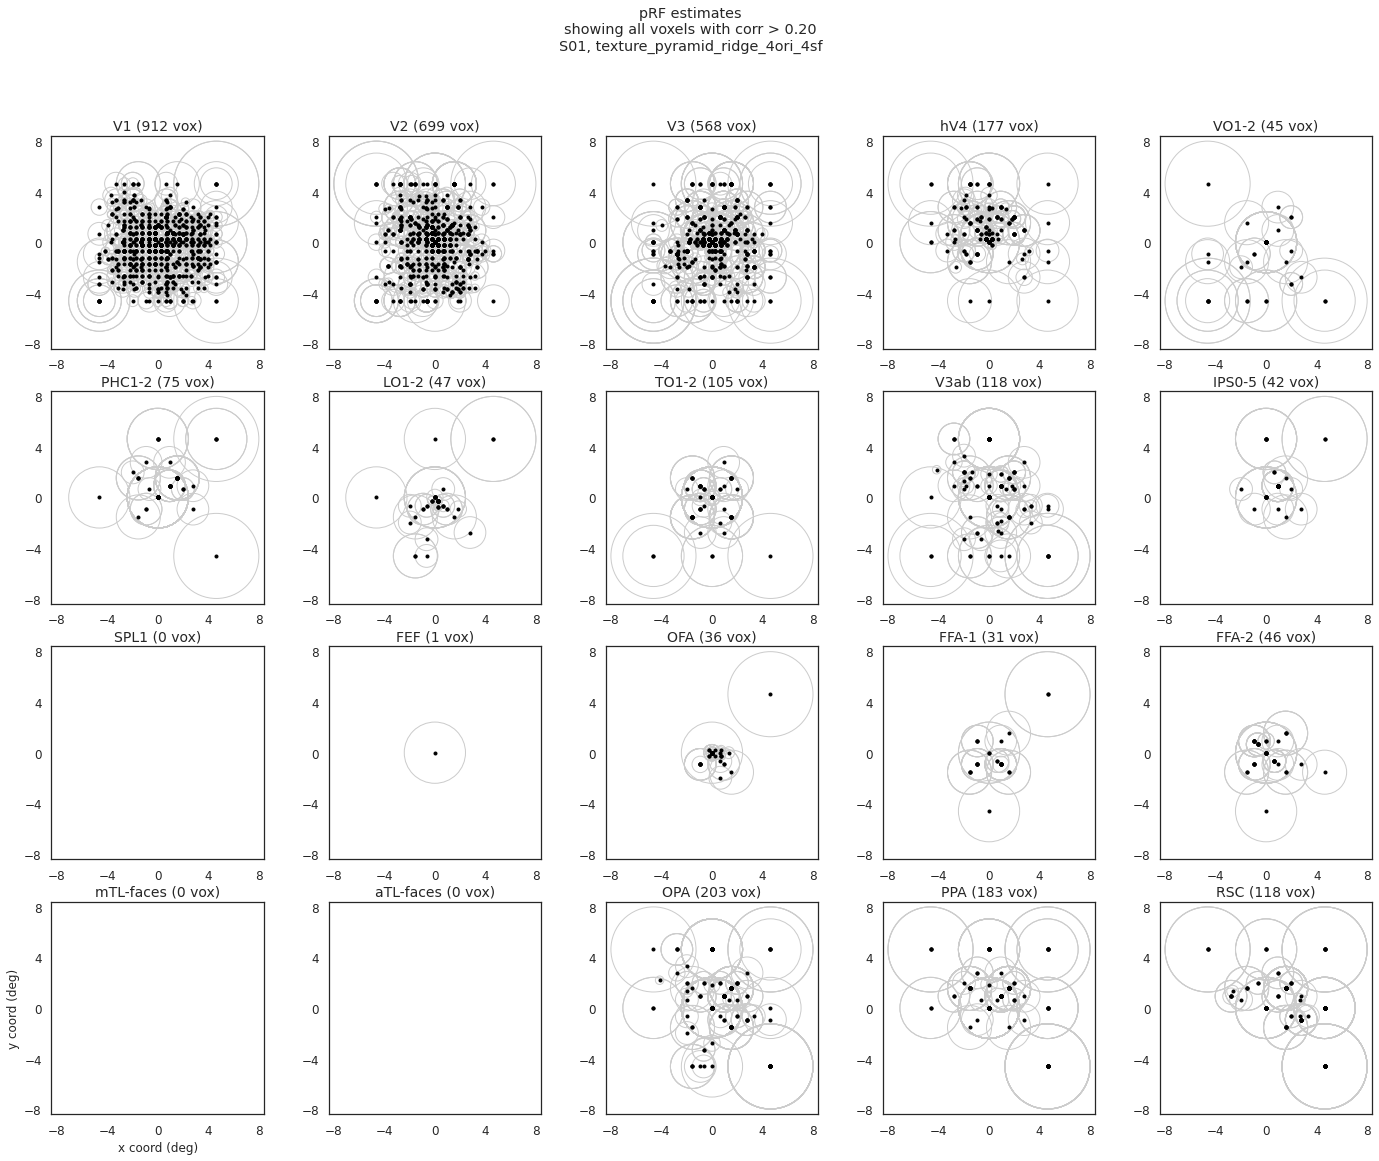

In [7]:
plot_utils.plot_spatial_rf_circles(subject, fitting_type,out, cc_cutoff = 0.20, fig_save_folder=fig_save_folder)

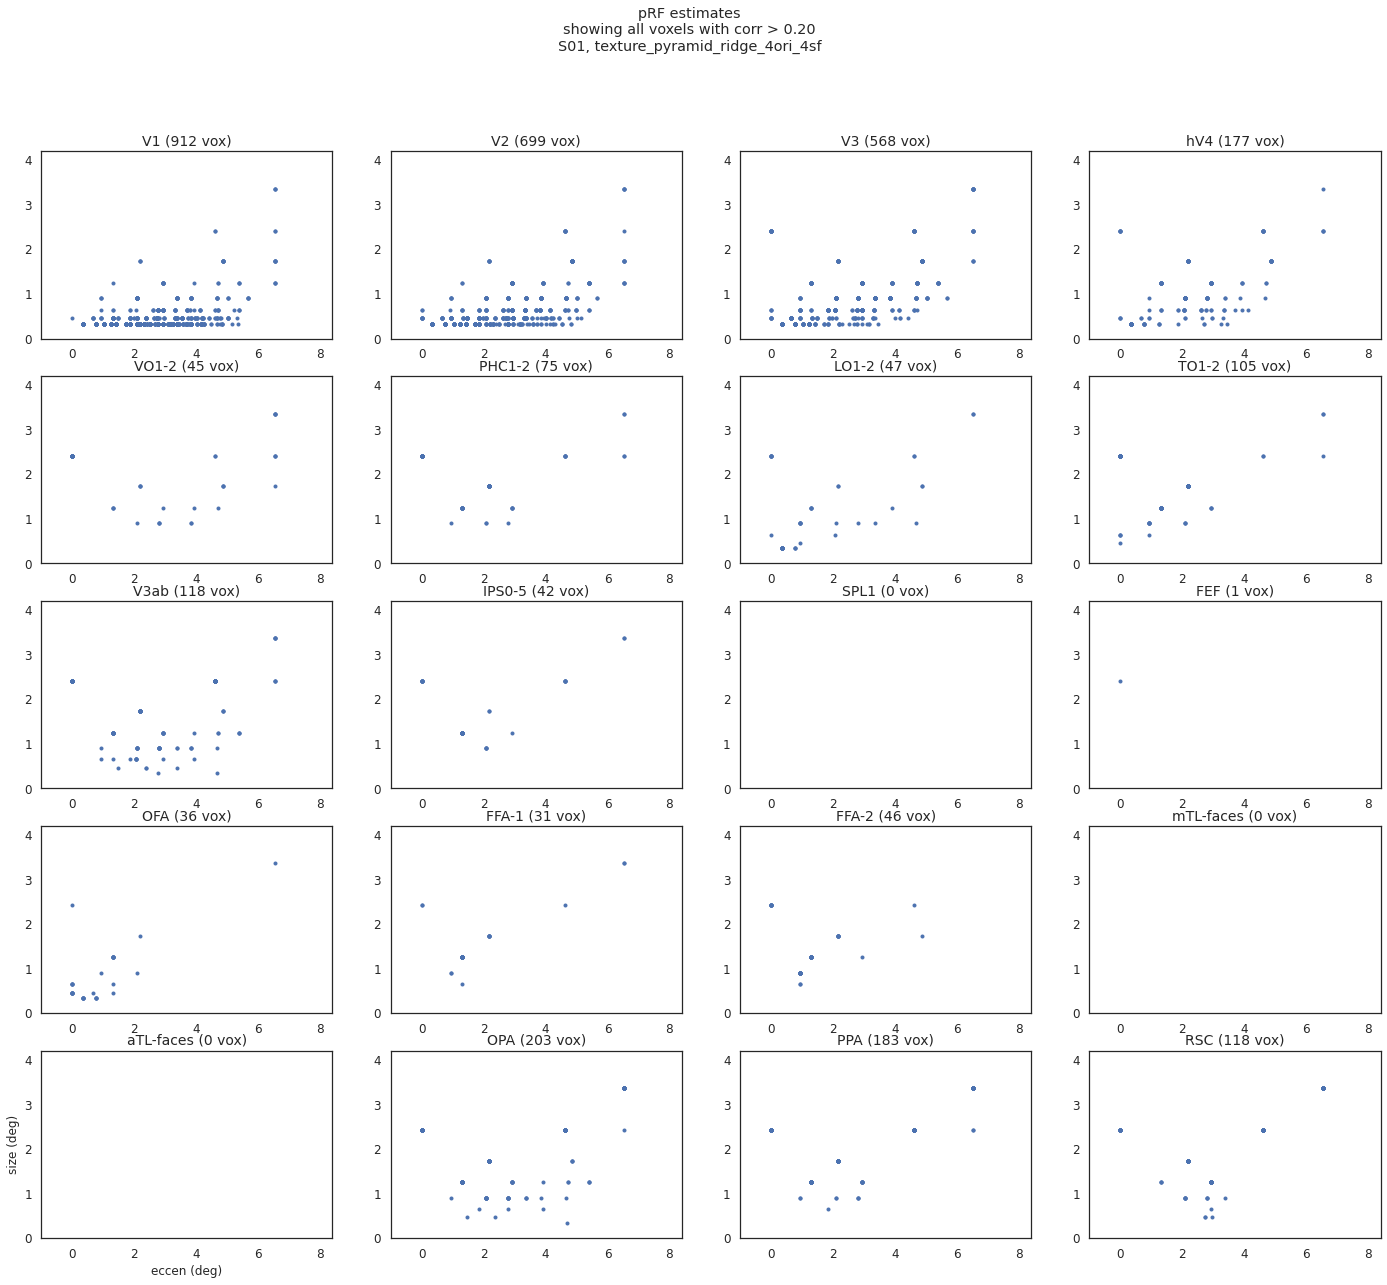

In [8]:
plot_utils.plot_size_vs_eccen(subject, fitting_type, out, cc_cutoff=0.2, fig_save_folder=fig_save_folder)

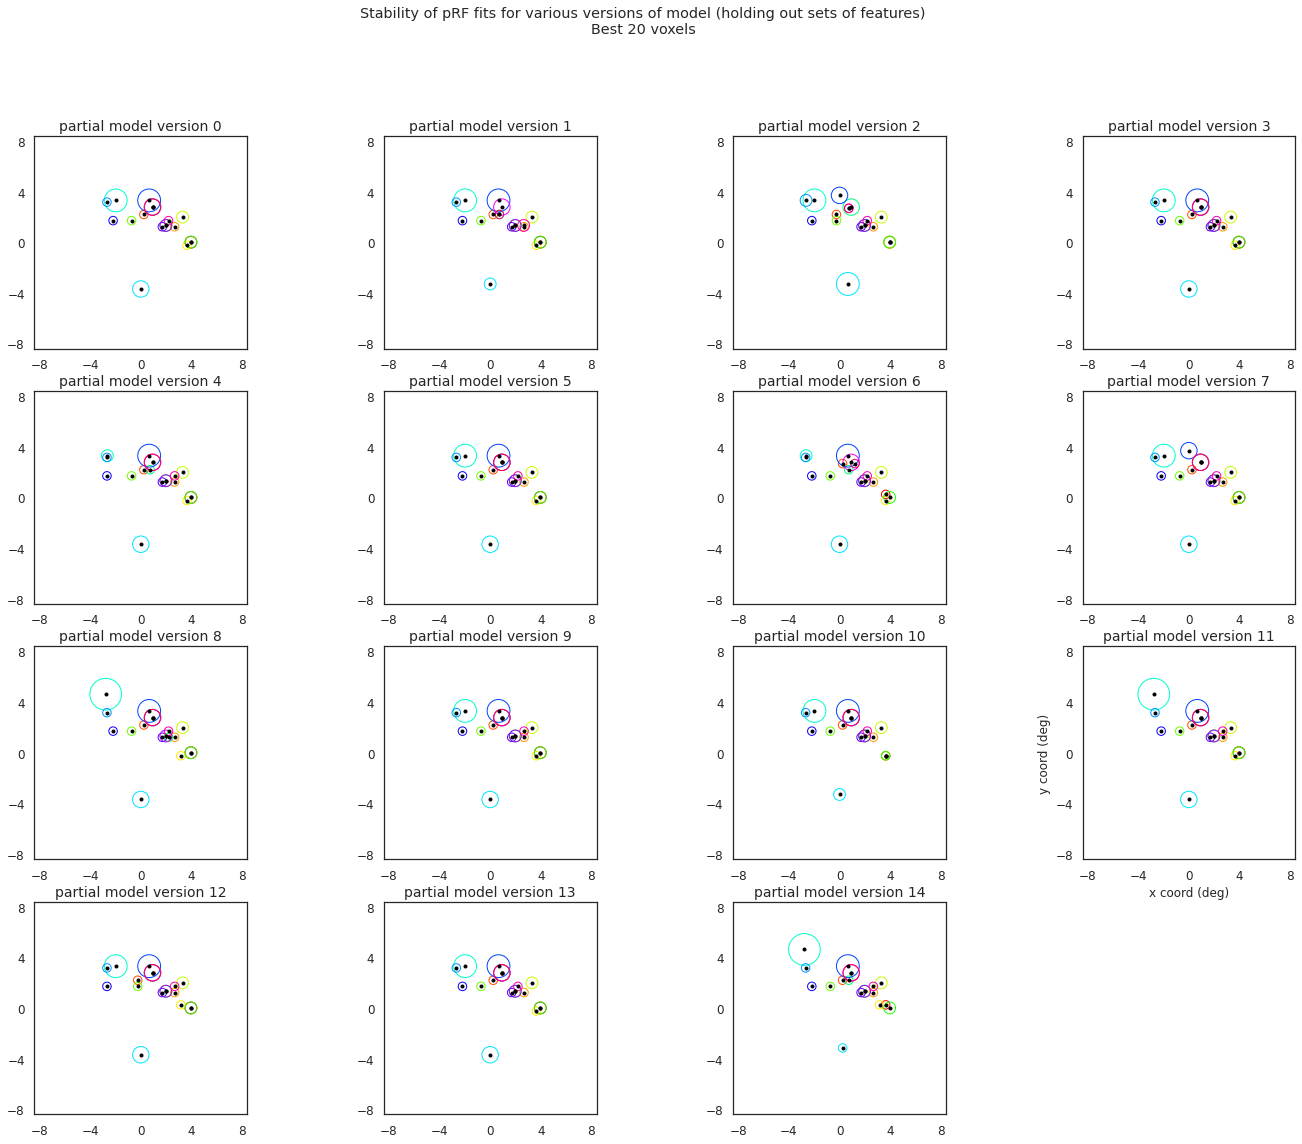

In [3]:
plot_utils.plot_prf_stability_partial_versions(subject, out, cc_cutoff = 0.2, screen_eccen_deg = 8.4, fig_save_folder=fig_save_folder)


['pixel_stats', 'mean_magnitudes', 'mean_realparts', 'marginal_stats_lowpass_recons', 'variance_highpass_resid', 'magnitude_feature_autocorrs', 'lowpass_recon_autocorrs', 'highpass_resid_autocorrs', 'magnitude_within_scale_crosscorrs', 'real_within_scale_crosscorrs', 'magnitude_across_scale_crosscorrs', 'real_imag_across_scale_crosscorrs', 'real_spatshift_within_scale_crosscorrs', 'real_spatshift_across_scale_crosscorrs']


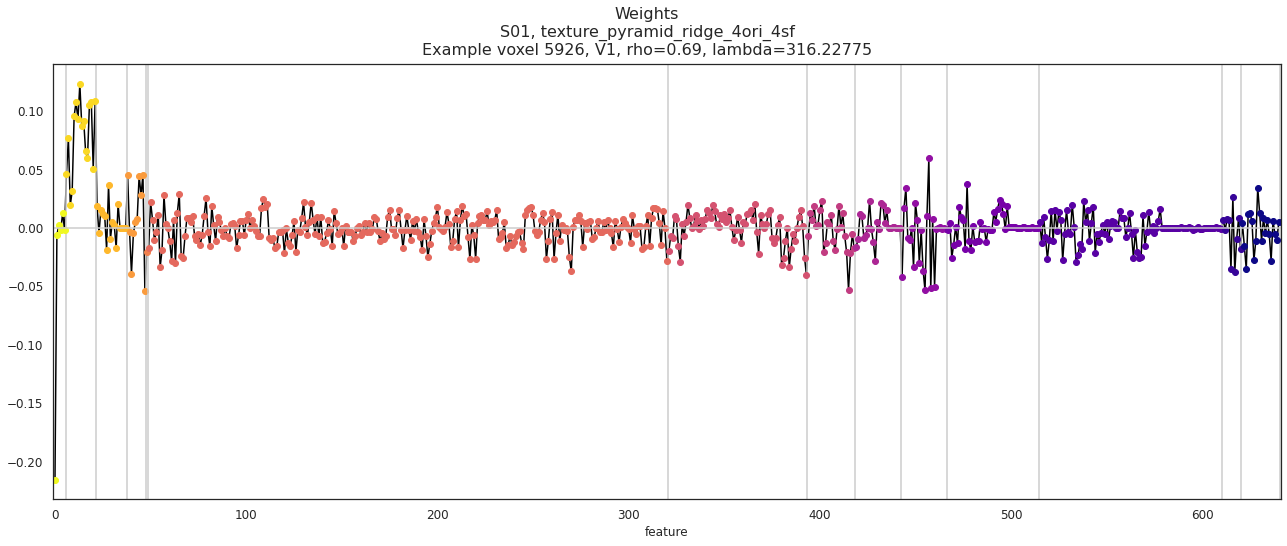

In [3]:
plot_utils.plot_example_weights_texture_pyramid(subject, fitting_type, out, fig_save_folder)

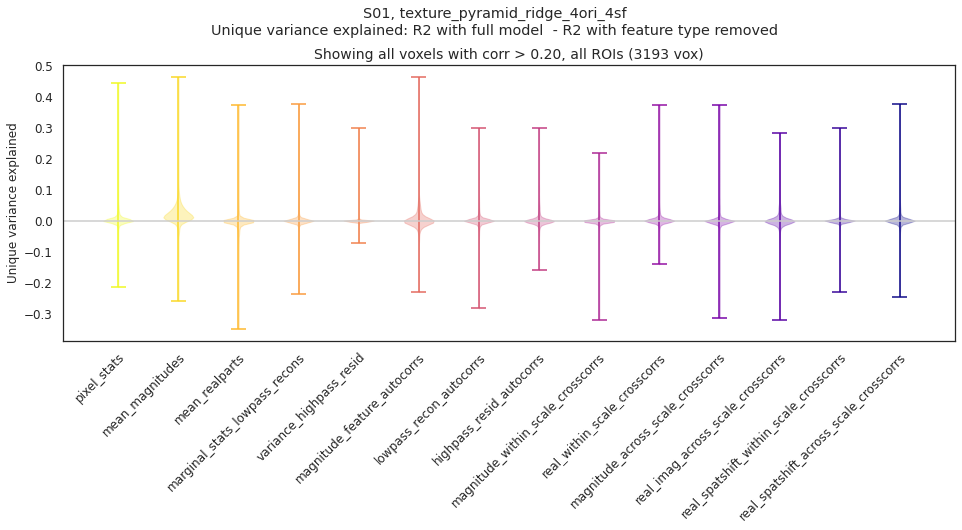

In [4]:
plot_utils.plot_uniqvar_violin_texture_pyramid(subject, fitting_type, out, cc_cutoff=0.2, fig_save_folder=fig_save_folder)


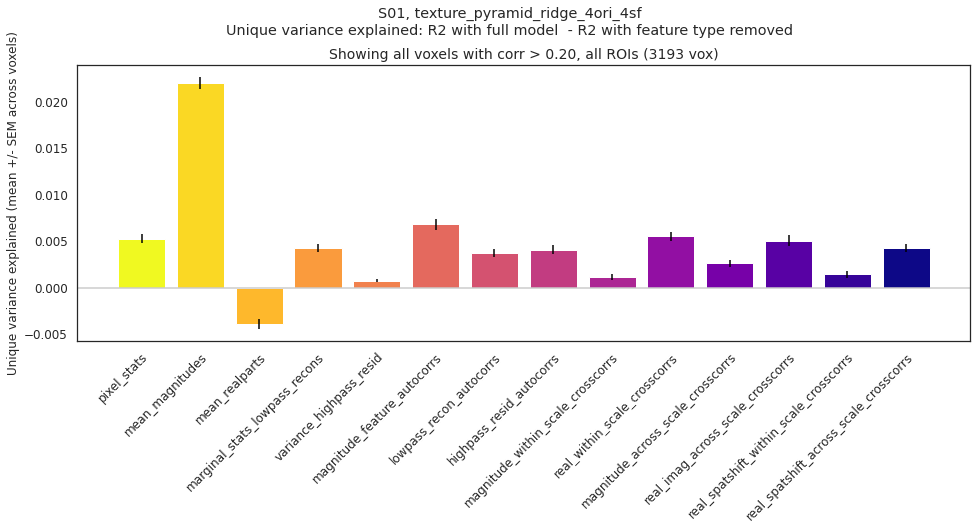

In [5]:
plot_utils.plot_uniqvar_bars_texture_pyramid(subject, fitting_type, out, cc_cutoff=0.2, fig_save_folder=fig_save_folder)


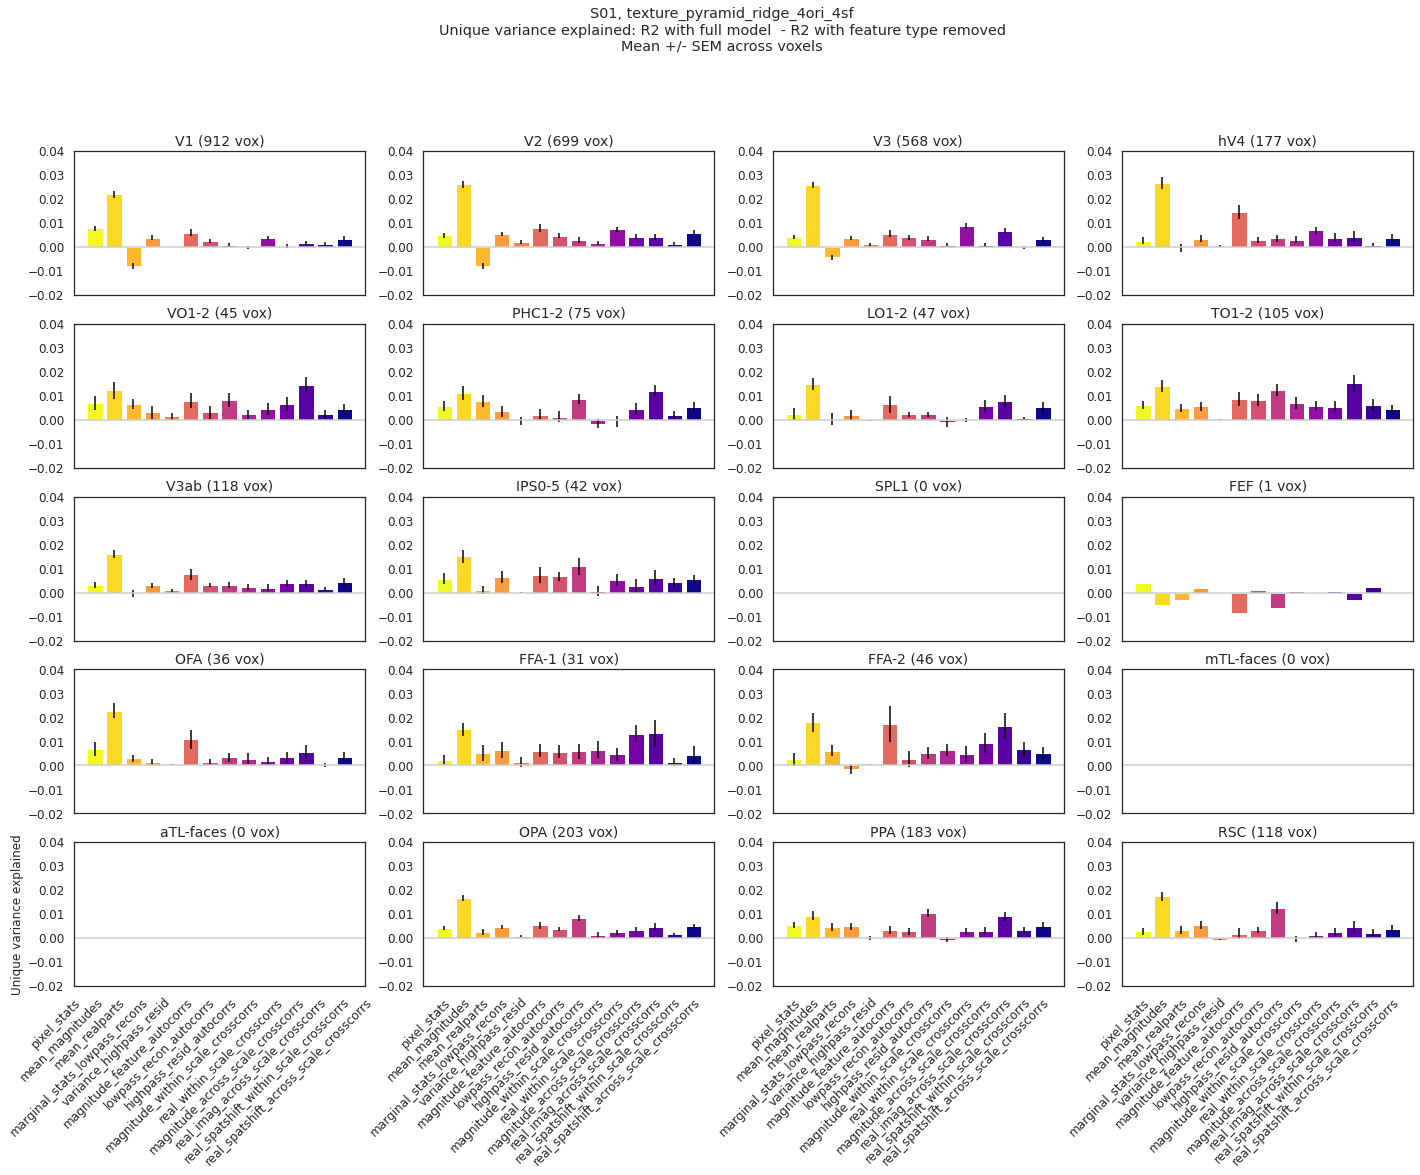

In [6]:
plot_utils.plot_uniqvar_bars_eachroi_texture_pyramid(subject, fitting_type, out, cc_cutoff=0.2, fig_save_folder=fig_save_folder)

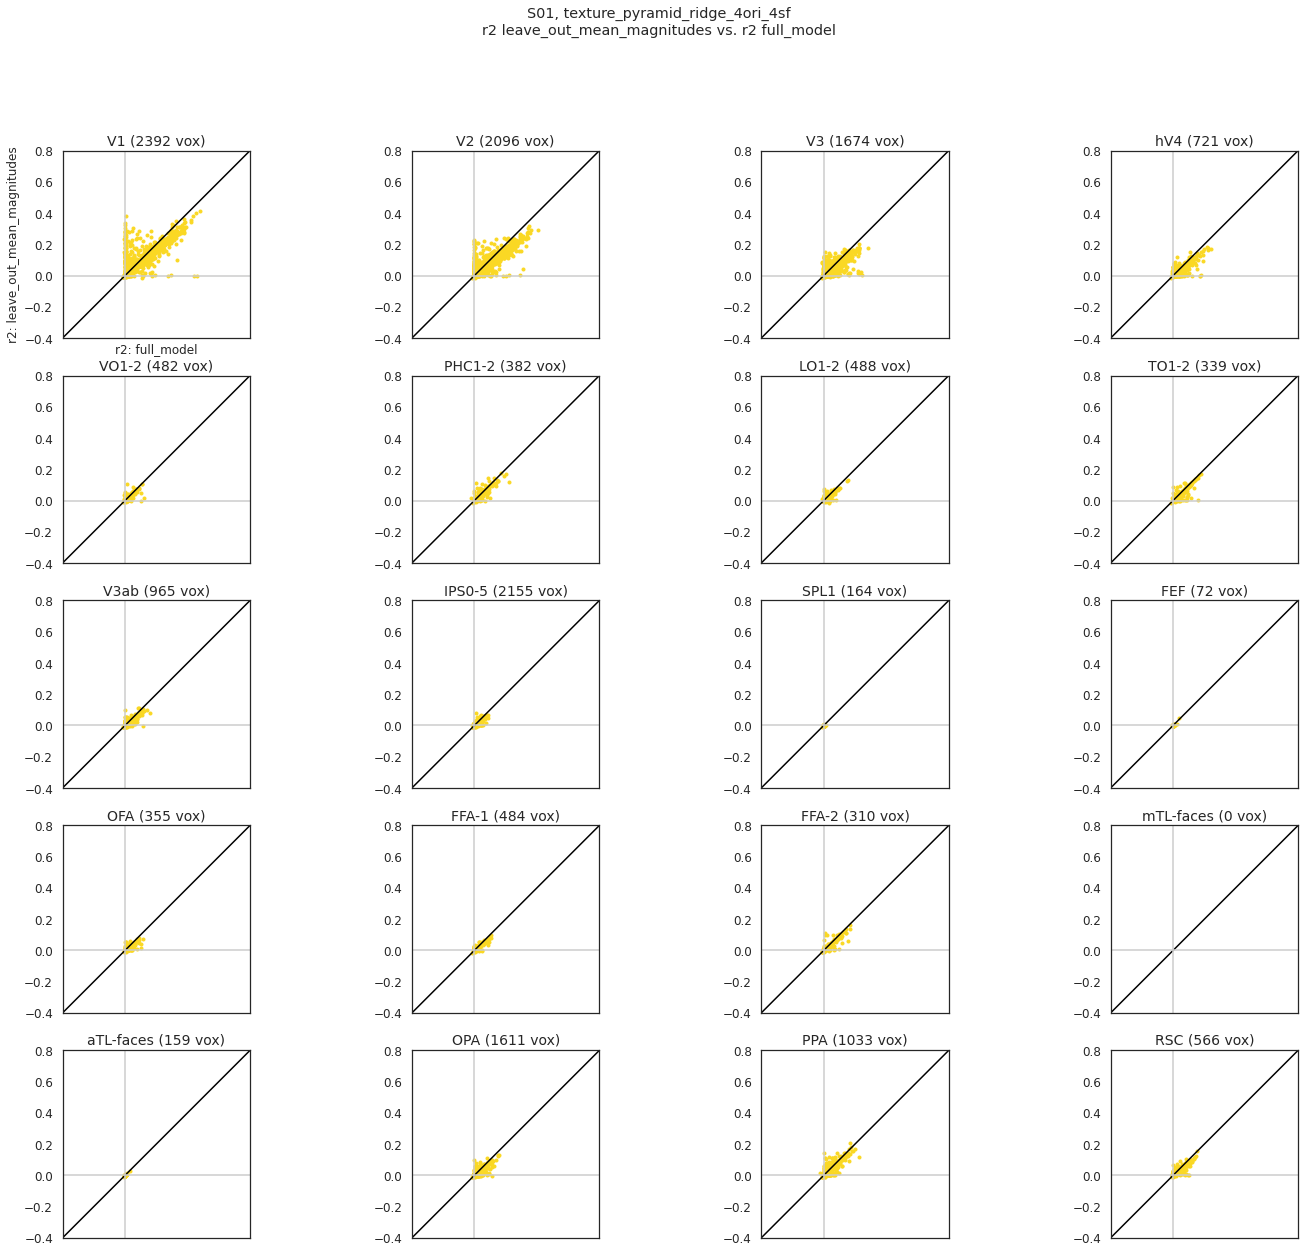

In [9]:
plot_utils.scatter_compare_partial_models(subject, fitting_type, out, pp1=0, pp2=2, fig_save_folder=fig_save_folder)

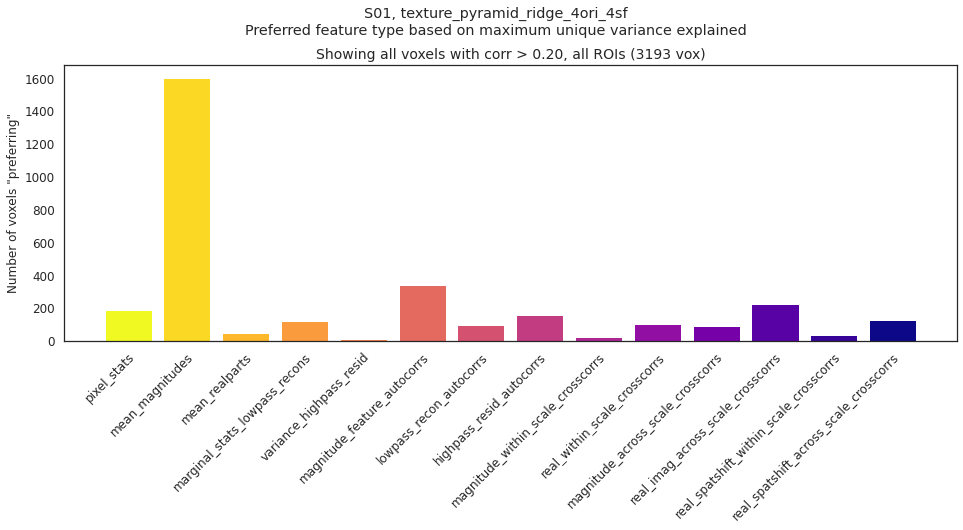

In [3]:
plot_utils.plot_feature_prefs_uniqvar_texture(subject, fitting_type, out, cc_cutoff = 0.2, fig_save_folder=fig_save_folder)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


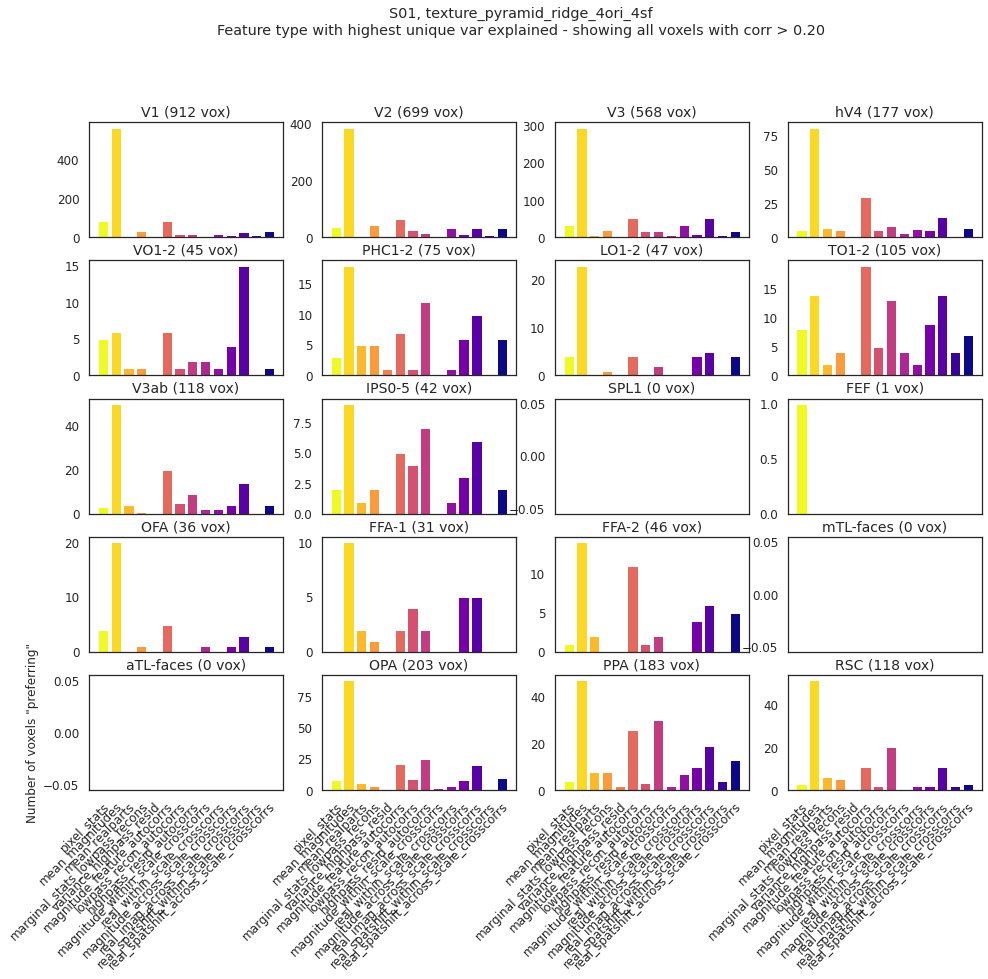

In [17]:
# from utils import roi_utils
import copy
plot_feature_prefs_uniqvar_texture(subject, fitting_type, out, cc_cutoff = 0.2, fig_save_folder=fig_save_folder)

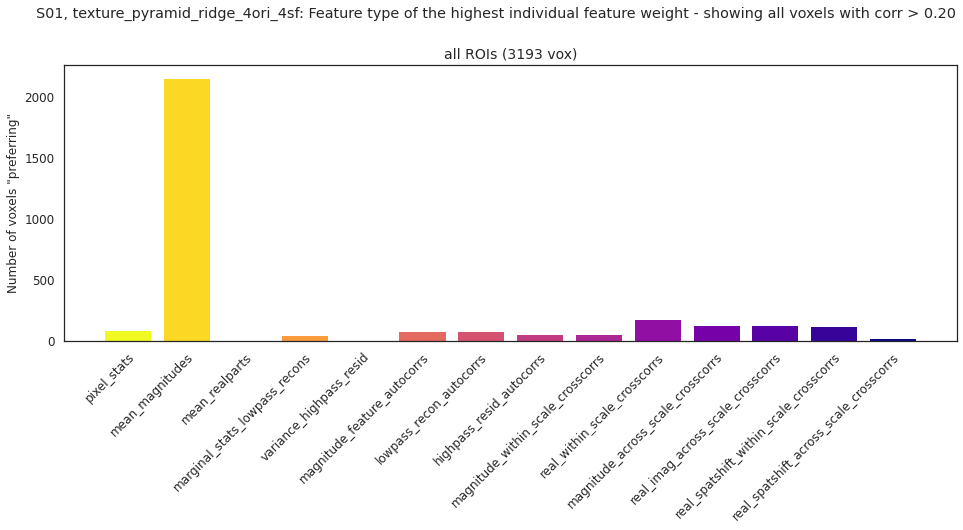

In [22]:
# Preferred feature type, based on highest encoding model weights.

fig = plt.figure(figsize=(16,8))
roi_labels_retino, roi_labels_categ, ret_group_inds, categ_group_inds, ret_group_names, categ_group_names, \
        n_rois_ret, n_rois_categ, n_rois = plot_utils.get_roi_info(subject, out)

npx = np.ceil(np.sqrt(n_rois))
npy = np.ceil(n_rois/npx)

weights = out['best_params'][1]
val_cc = out['val_cc']

feature_info = copy.deepcopy(out['feature_info'])
feature_type_labels, feature_type_names = feature_info
n_feature_types = len(feature_type_names)


colors = cm.plasma(np.linspace(0,1,n_feature_types))
colors = np.flipud(colors)

# mean_weight_each_type = np.concatenate([np.expand_dims(np.mean(weights[:,feature_type_labels==ff], axis=1),axis=1) for ff in range(len(feature_type_names))], axis=1)
# max_wt = np.argmax(mean_weight_each_type, axis=1)

max_wt = feature_type_labels[np.argmax(weights[:,:,0],axis=1)]

cc_cutoff = 0.2

abv_thresh = val_cc[:,0]>cc_cutoff
inds2use = abv_thresh

unvals = np.arange(0,n_feature_types)
counts = [np.sum(np.logical_and(max_wt==ff, inds2use)) for ff in unvals]

# unvals, counts = np.unique(max_wt[inds2use], return_counts=True)
for ff in range(n_feature_types):
    plt.bar(unvals[ff], counts[ff], color=colors[ff,:])

plt.xticks(ticks=np.arange(0,n_feature_types),labels=feature_type_names,rotation=45, ha='right',rotation_mode='anchor')
# plt.xlabel('feature type')
plt.ylabel('Number of voxels "preferring"')

plt.title('all ROIs (%d vox)'%( np.sum(inds2use)))

plt.suptitle('S%02d, %s: Feature type of the highest individual feature weight - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
# plt.suptitle('S%02d, %s: Feature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features_allrois.pdf'))
plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features_allrois.png'))

In [36]:
feature_type_labels[0]

0

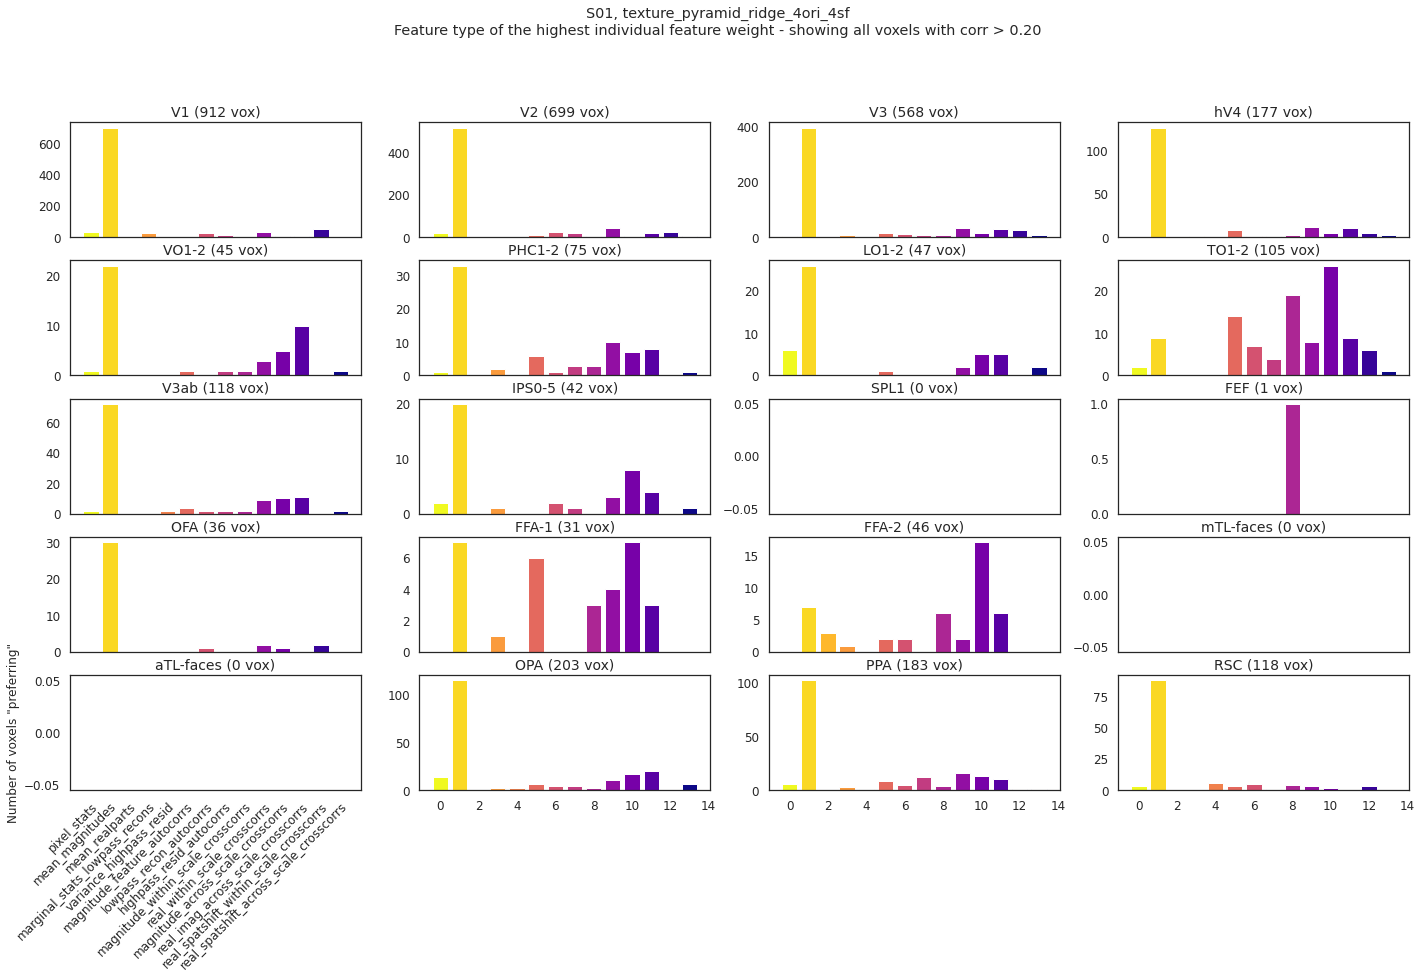

In [24]:
# Preferred feature type, based on encoding model weights. Separate plot each ROI.

fig = plt.figure(figsize=(24,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

colors = cm.plasma(np.linspace(0,1,n_feature_types))
colors = np.flipud(colors)

# mean_weight_each_type = np.concatenate([np.expand_dims(np.mean(weights[:,feature_type_labels==ff], axis=1),axis=1) for ff in range(len(feature_type_names))], axis=1)
# max_wt = np.argmax(mean_weight_each_type, axis=1)

max_wt = feature_type_labels[np.argmax(weights[:,:,0],axis=1)]

cc_cutoff = 0.2

for rr in range(n_rois):
        
    if rr<n_rois_ret:
        inds_this_roi = np.isin(roi_labels_retino, ret_group_inds[rr])
        rname = ret_group_names[rr]
    else:
        inds_this_roi = np.isin(roi_labels_categ, categ_group_inds[rr-n_rois_ret])
        rname = categ_group_names[rr-n_rois_ret]
        
    abv_thresh = val_cc[:,0]>cc_cutoff
    inds2use = np.logical_and(inds_this_roi, abv_thresh)
    
    plt.subplot(npx,npy,rr+1)
    
#     unvals, counts = np.unique(max_wt[inds2use], return_counts=True)
    unvals = np.arange(0,n_feature_types)
    counts = [np.sum(max_wt[inds2use]==ff) for ff in range(n_feature_types)]
    for ff in range(len(unvals)):
        plt.bar(unvals[ff], counts[ff], color=colors[ff,:])
 
    
    if rr==n_rois-4:
        plt.ylabel('Number of voxels "preferring"')
        plt.xticks(ticks=np.arange(0,n_feature_types),labels=feature_type_names,rotation=45, ha='right',rotation_mode='anchor')
#         fig.autofmt_xdate()
    elif rr<n_rois-4:
        plt.xticks([])
#         plt.yticks([])

    plt.title('%s (%d vox)'%(rname, np.sum(inds2use)))

plt.suptitle('S%02d, %s\nFeature type of the highest individual feature weight - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
# plt.suptitle('S%02d, %s\nFeature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features.pdf'))
plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features.png'))



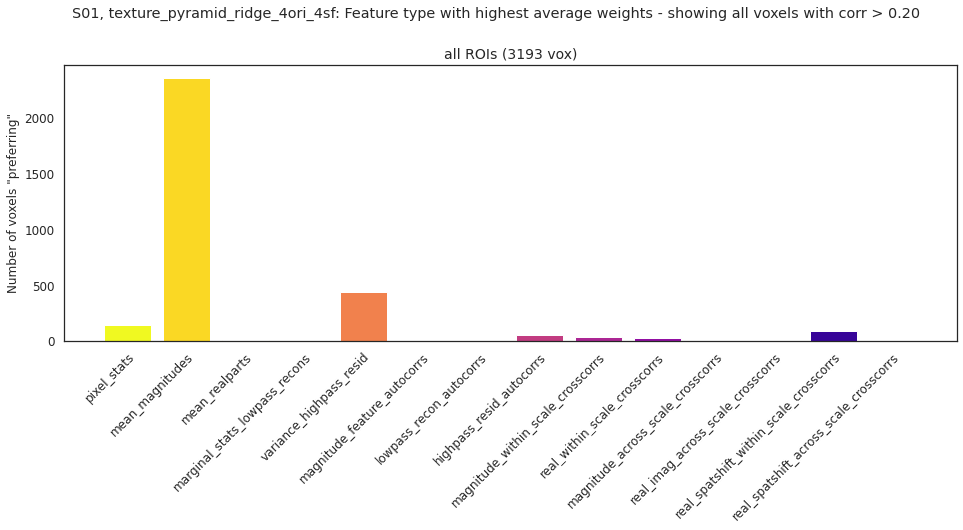

In [26]:
# Preferred feature type, based on highest average encoding model weights.

fig = plt.figure(figsize=(16,8))
npx = np.ceil(np.sqrt(n_rois))
npy = np.ceil(n_rois/npx)

colors = cm.plasma(np.linspace(0,1,n_feature_types))
colors = np.flipud(colors)

mean_weight_each_type = np.concatenate([np.expand_dims(np.mean(weights[:,feature_type_labels==ff,0], axis=1),axis=1) for ff in range(len(feature_type_names))], axis=1)
max_wt = np.argmax(mean_weight_each_type, axis=1)

# max_wt = feature_type_labels[np.argmax(weights[:,:,0],axis=1)]

cc_cutoff = 0.2

abv_thresh = val_cc[:,0]>cc_cutoff
inds2use = abv_thresh

unvals = np.arange(0,n_feature_types)
counts = [np.sum(np.logical_and(max_wt==ff, inds2use)) for ff in unvals]

# unvals, counts = np.unique(max_wt[inds2use], return_counts=True)
for ff in range(n_feature_types):
    plt.bar(unvals[ff], counts[ff], color=colors[ff,:])

plt.xticks(ticks=np.arange(0,n_feature_types),labels=feature_type_names,rotation=45, ha='right',rotation_mode='anchor')
# plt.xlabel('feature type')
plt.ylabel('Number of voxels "preferring"')

plt.title('all ROIs (%d vox)'%( np.sum(inds2use)))

plt.suptitle('S%02d, %s: Feature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
# plt.suptitle('S%02d, %s: Feature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
plt.gcf().subplots_adjust(bottom=0.4)
# plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features_allrois.pdf'))
# plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features_allrois.png'))

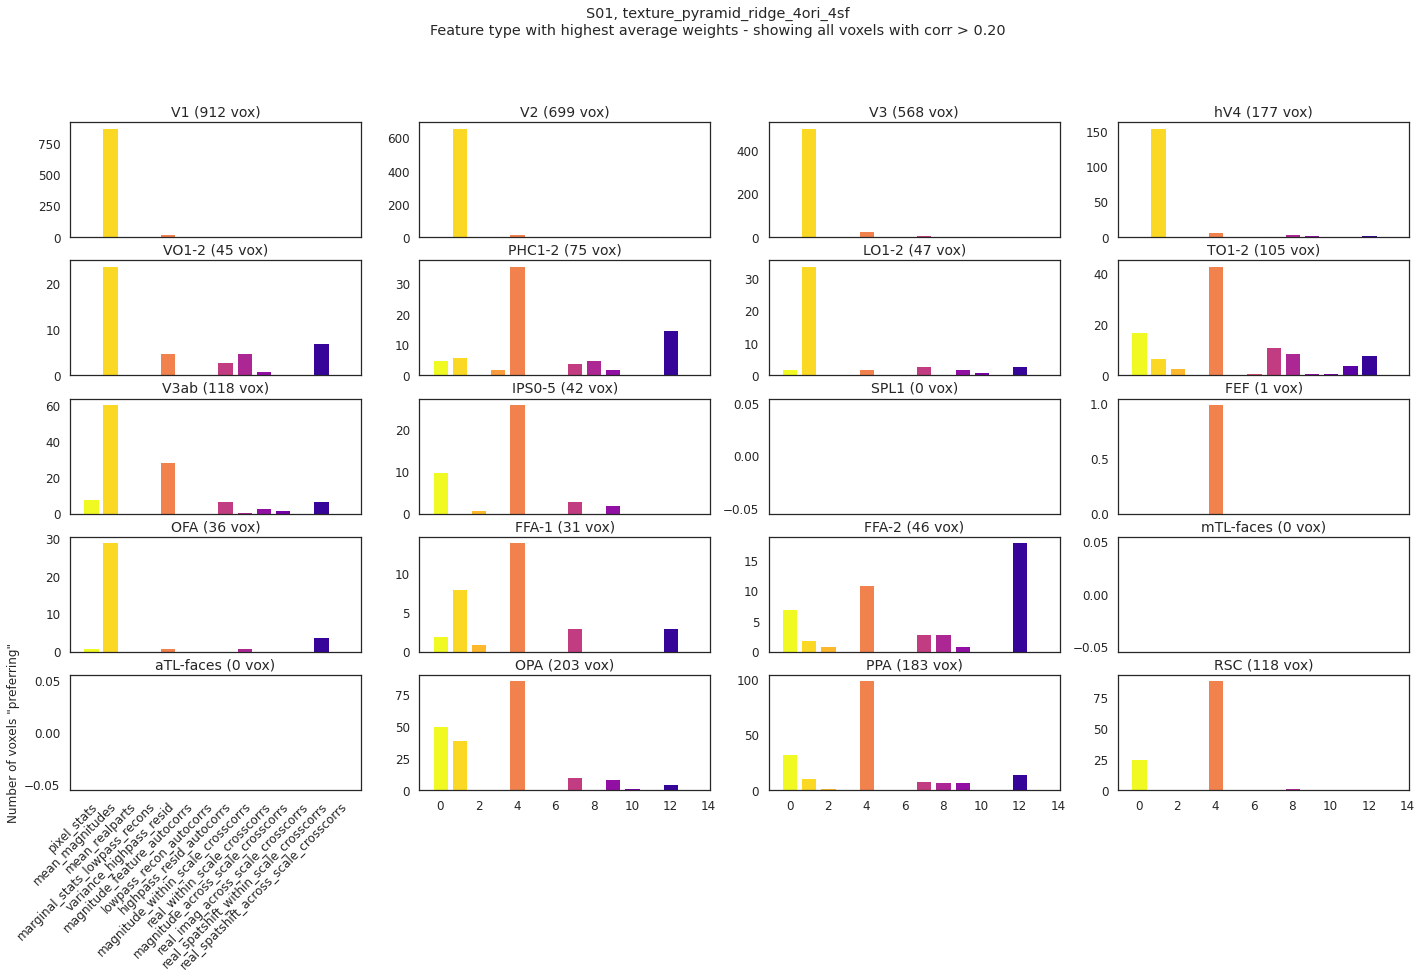

In [28]:
# Preferred feature type, based on encoding model weights. Separate plot each ROI.

fig = plt.figure(figsize=(24,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

colors = cm.plasma(np.linspace(0,1,n_feature_types))
colors = np.flipud(colors)

mean_weight_each_type = np.concatenate([np.expand_dims(np.mean(weights[:,feature_type_labels==ff,0], axis=1),axis=1) for ff in range(len(feature_type_names))], axis=1)
max_wt = np.argmax(mean_weight_each_type, axis=1)

# max_wt = feature_type_labels[np.argmax(weights[:,:,0],axis=1)]

cc_cutoff = 0.2

for rr in range(n_rois):
        
    if rr<n_rois_ret:
        inds_this_roi = np.isin(roi_labels_retino, ret_group_inds[rr])
        rname = ret_group_names[rr]
    else:
        inds_this_roi = np.isin(roi_labels_categ, categ_group_inds[rr-n_rois_ret])
        rname = categ_group_names[rr-n_rois_ret]
        
    abv_thresh = val_cc[:,0]>cc_cutoff
    inds2use = np.logical_and(inds_this_roi, abv_thresh)
    
    plt.subplot(npx,npy,rr+1)
    
#     unvals, counts = np.unique(max_wt[inds2use], return_counts=True)
    unvals = np.arange(0,n_feature_types)
    counts = [np.sum(max_wt[inds2use]==ff) for ff in range(n_feature_types)]
    for ff in range(len(unvals)):
        plt.bar(unvals[ff], counts[ff], color=colors[ff,:])
 
    
    if rr==n_rois-4:
        plt.ylabel('Number of voxels "preferring"')
        plt.xticks(ticks=np.arange(0,n_feature_types),labels=feature_type_names,rotation=45, ha='right',rotation_mode='anchor')
#         fig.autofmt_xdate()
    elif rr<n_rois-4:
        plt.xticks([])
#         plt.yticks([])

    plt.title('%s (%d vox)'%(rname, np.sum(inds2use)))

plt.suptitle('S%02d, %s\nFeature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
# plt.suptitle('S%02d, %s\nFeature type with highest average weights - showing all voxels with corr > %.2f'%(subject, fitting_type, cc_cutoff));
plt.gcf().subplots_adjust(bottom=0.3)
# plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features.pdf'))
# plt.savefig(os.path.join(fig_save_folder,'hist_highest_wt_features.png'))

